# Prédiction de la Survie des Passagers du Titanic

## Contexte
Ce projet vise à prédire les chances de survie des passagers du Titanic en utilisant des techniques de machine learning. Nous utiliserons PyCaret pour automatiser le flux de travail et améliorer la productivité.


## Importation des bibliothèques

In [6]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Chargement des données

In [7]:
file_path = 'data/titanic.csv' 
# Utilise la première colonne comme index
data = pd.read_csv(file_path, index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Aperçu des données

In [8]:
print(data.head())
print(data.info())
print(data.describe())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

## Prétraitement des données

In [9]:
# Vérification des colonnes disponibles
print(data.columns)

# Identification et gestion des valeurs manquantes, on y met la médiane.
data['Age'].fillna(data['Age'].median(), inplace=True)

# Suppression conditionnelle des colonnes
columns_to_drop = ['Name', 'Ticket', 'Cabin']
existing_columns = [col for col in columns_to_drop if col in data.columns]
data.drop(existing_columns, axis=1, inplace=True)

# Il faut faire une compréhension de liste
#  expression itérateur itérable  2*i for i in cols



# Conversion des variables catégorielles en variables numériques
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
#  affiche data
data


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,False,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,True
5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,True,False,True
888,1,1,19.0,0,0,30.0000,False,False,True
889,0,3,28.0,1,2,23.4500,False,False,True


## Analyse exploratoire des données (EDA)

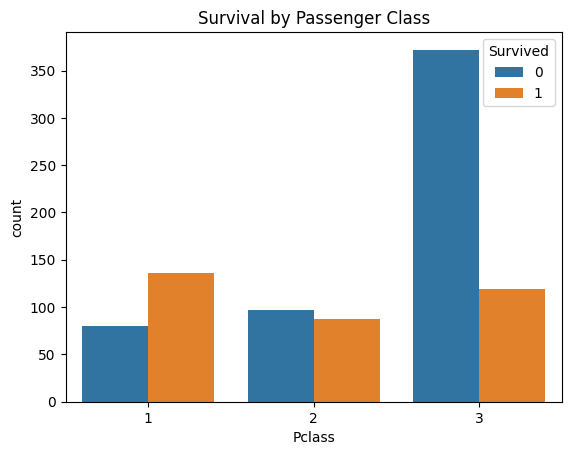

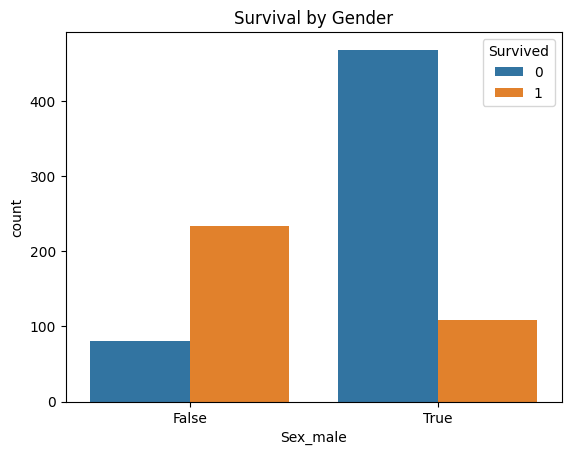

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Sex_male', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()